EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 1: Python Setup
## Due October 10, 2021 by 11:59 PM
### <span style="color: red">Sarah Storer</span>

Copyright &copy; 2021, University of Washington

<hr>

### 1. Complex Numbers
Write a function `rand_complex(n)` that returns a list of `n` random complex numbers uniformly distributed in the unit circle (i.e., the magnitudes of the numbers are all between 0 and 1). Give the function a docstring. Demonstrate the function by making a list of 25 complex numbers. 

In [20]:
import random

def rand_complex(n):
    """Returns a list of n random complex numbers whose magnitudes are all between 0 and 1."""
    randarray = []
    for i in range(n):
        c = complex(round(random.uniform(0,1), 2), round(random.uniform(0,1), 2))
        randarray.append(c)
    return randarray

c = rand_complex(25)
print(c)

[(0.17+0.13j), (0.01+0.51j), (0.24+0.11j), (0.66+0.23j), (0.68+0.26j), (0.81+0.7j), (0.68+0.6j), (0.54+0.04j), (0.11+0.3j), (0.4+0.67j), (0.86+0.28j), (0.73+0.52j), (0.27+0.62j), (0.06+0.94j), (0.82+0.85j), (0.89+0.84j), (0.4+0.18j), (0.64+0.72j), (0.03+0.86j), (0.32+0.39j), (0.6+0.46j), (0.21+0.44j), (0.52+0.81j), (0.52+0.9j), (0.95+0.17j)]


### 2. Hashes
Write a function `to_hash(L) `that takes a list of complex numbers `L` and returns an array of hashes of equal length, where each hash is of the form `{ "re": a, "im": b }`. Give the function a docstring and test it by converting a list of 25 numbers generated by your `rand_complex` function. 

In [22]:
def to_hash(L):
    """Return an array of hashes of equal length to L where L is a list of complex numbers and each hash is of the form {"re":a, "im":b}."""
    hasharray = []
    for x in L:
        hasharray.append({"re":x.real, "im":x.imag})
    return hasharray

h = to_hash(c)
print(h)        

[{'re': 0.17, 'im': 0.13}, {'re': 0.01, 'im': 0.51}, {'re': 0.24, 'im': 0.11}, {'re': 0.66, 'im': 0.23}, {'re': 0.68, 'im': 0.26}, {'re': 0.81, 'im': 0.7}, {'re': 0.68, 'im': 0.6}, {'re': 0.54, 'im': 0.04}, {'re': 0.11, 'im': 0.3}, {'re': 0.4, 'im': 0.67}, {'re': 0.86, 'im': 0.28}, {'re': 0.73, 'im': 0.52}, {'re': 0.27, 'im': 0.62}, {'re': 0.06, 'im': 0.94}, {'re': 0.82, 'im': 0.85}, {'re': 0.89, 'im': 0.84}, {'re': 0.4, 'im': 0.18}, {'re': 0.64, 'im': 0.72}, {'re': 0.03, 'im': 0.86}, {'re': 0.32, 'im': 0.39}, {'re': 0.6, 'im': 0.46}, {'re': 0.21, 'im': 0.44}, {'re': 0.52, 'im': 0.81}, {'re': 0.52, 'im': 0.9}, {'re': 0.95, 'im': 0.17}]


### 3. Matrices

Write a function `lower_traingular(n)` that returns an $n \times n$ numpy matrix with zeros on the upper diagonal, and ones on the diagonal and lower diagonal. For example, `lower_triangular(3)` would return

```python
array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])
```

In [42]:
import numpy as np

def lower_triangular(n):
    """Return an nXn numpy matrix with zeros on the upper diagonal and ones on the diagonal and lower diagonal."""
    matrixArrays = []
    for x in range(n):
        matrixRow = [0] * n
        for y in range(x+1):
            matrixRow[y] = 1
        matrixArrays.append(matrixRow)
    
    a = np.asmatrix(matrixArrays)
    return a

print(lower_triangular(6))

[[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]


### 4. Numpy

Write a function `convolve(M,K)` that takes an $n \times m$ matrix $M$ and a $3 \times 3$ matrix $K$ (called the kernel) and returns their convolution as in [this diagram](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYo2_VuAlQhfeEGJHva3WUlnSJLeE0ApYyjw&usqp=CAU).


Please do not use any predefined convolution functions from numpy or scipy. Write your own. If the matrix $M$ is too small, your function should return a exception.

You can read more about convolution in [this post](https://setosa.io/ev/image-kernels/).

The matrix returned will have two fewer rows and two fewer columns than $M$. Test your function by making a $100 \times 100$ matrix of zeros and ones that as an image look like the letter X and convolve it with the kernel

$$
K = \frac{1}{16} \begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Use `imshow` to display both images using subplots. 

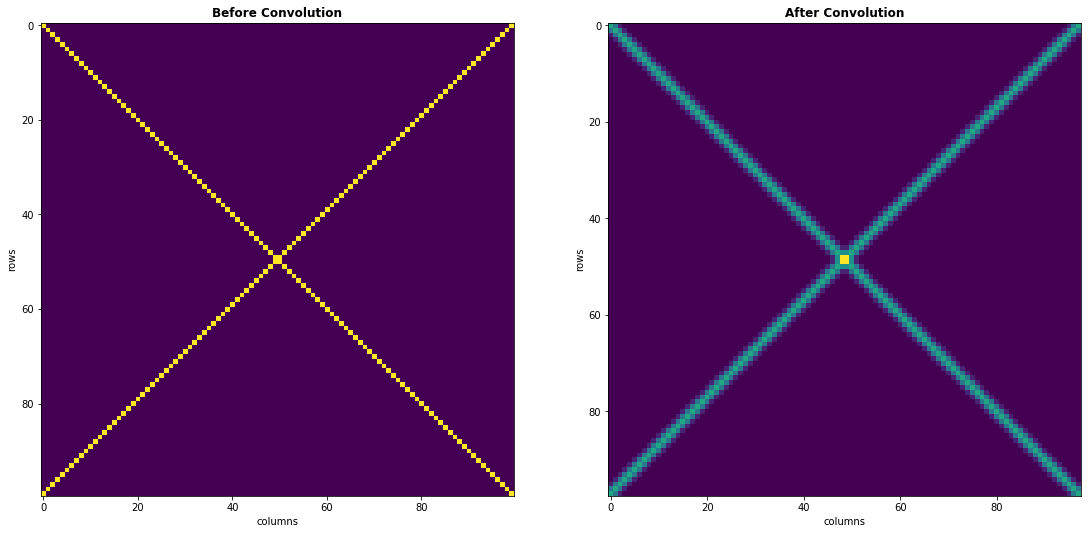

In [173]:
import numpy as np
import matplotlib.pyplot as plt

def convolve(M,K):
    """Return the convolution of an nXm matrix M and a 3X3 matrix K."""
    x = M.shape
    y = K.shape
    if x[0] <= 2 or x[1] < 3:
        raise Exception("The matrix is too small! Try again with a 3x3 matrix or greater");
    finalArray = []
    for rows in range(x[0] - 2):
        for columns in range(x[1] - 2):
            #now do the convolution
            addTotal = 0
            for a in range(y[0]):
                for b in range(y[1]):
                    multTotal = M[rows+a][columns+b] * K[a][b]
                    addTotal += multTotal
            finalArray.append(addTotal)
            
    #now make the flat list of values into the final convolved matrix
    z = np.array(finalArray)
    z = z.reshape(x[0]-2, x[1]-2)
    return z

fig = plt.figure(figsize=(100, 200))
a = np.zeros((100, 100), int);
np.fill_diagonal(np.fliplr(a), 1)
np.fill_diagonal(a, 1)
fig.add_subplot(10, 10, 1)
plt.imshow(a)
plt.title('Before Convolution', fontweight ="bold")
plt.xlabel("columns")
plt.ylabel("rows")

K = np.array([[1,2,1],[2,4,2],[1,2,1]])
K = np.multiply(K, (1/16))
fig.add_subplot(10, 10, 2)
plt.imshow(convolve(a, K))
plt.title('After Convolution', fontweight ="bold")
plt.xlabel("columns")
plt.ylabel("rows")
plt.show()

### 5. Symbolic Manipulation

Use sympy to specify and solve the following equations for $x$.

- $x^2 + 2x - 1 = 0$ 
- $a x^2 + bx + c = 0$

Also, evaluate the following integrals using sympy

- $\int x^2 dx$
- $\int x e^{6x} dx$
- $\int (3t+5)\cos(\frac{t}{4}) dt$

In [198]:
from sympy import symbols, Eq, solve, integrate, exp, cos
x = symbols('x')
expr1 = x**2 + 2*x - 1
print(solve(Eq(expr1, 0), x))
      
a = symbols('a')
b = symbols('b')
c = symbols('c')
expr2 = a*x**2 + b*x + c
print(solve(Eq(expr2, 0), x))

expr3 = x**2
print(integrate(expr3))

expr4 = x * exp(6*x)
print(integrate(expr4))

t = symbols('t')
expr5 = (3*t + 5)*cos(t/4)
print(integrate(expr5))

[-1 + sqrt(2), -sqrt(2) - 1]
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]
x**3/3
(6*x - 1)*exp(6*x)/36
12*t*sin(t/4) + 20*sin(t/4) + 48*cos(t/4)


### 6. Typesetting

Use LaTeX to typeset the following equations.

<img src="https://www.sciencealert.com/images/Equations_web.jpg">


### 1. Pythagoras's Theorem

$a^2 + b^2 = c^2$

### 2. Logarithms

$\log xy = \log x + \log y$

### 3. Calculus

$\frac{df}{dt} = \lim\limits_{h \to 0} = \frac{f(t+h) - f(t)}{h}$

### 4. Law of Gravity

$F=G\frac{m_1m_2}{r^2}$

### 5. The Square Root of Minus One

$i^2 = -1$

### 6. Euler's Formula for Polyhedra

$V+E-F=2$

### 7. Normal Distribution

$\phi(x) = \frac{1}{\sqrt{2\pi\rho}}e^{\frac{(x-\mu)^2}{2\rho^2}}$

### 8. Wave Equation

$\frac{\partial^2u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}$

### 9. Fourier Transform

$f(\omega) = \int_{-\infty}^{\infty} f(x)e^{-2 \pi i x \omega}dx$

### 10. Navier-Stokes Equation

$\rho(\frac{\partial \textbf{v}}{\partial t} = \textbf{v} \cdot \nabla \textbf{v}) = -\nabla p + \nabla \cdot \textbf{T} + \textbf{f}$

### 11. Maxwell's Equations
$\nabla \cdot \textbf{E} = 0$

$\nabla \cdot \textbf{H} = 0$

$\nabla \times \textbf{E} = -\frac{1}{c}\frac{\partial \textbf{H}}{\partial t}$

$\nabla \times \textbf{H} = -\frac{1}{c}\frac{\partial E}{\partial t}$

### 12. Second Law of Thermodynamics

$\text{d}S \geq 0$

### 13. Relativity

$E = mc^2$

### 14. Schrodinger's Equation

$ih\frac{\partial}{\partial t}\psi = H\psi$

### 15. Information Theory

$H = -\sum p(x)\log p(x)$

### 16. Chaos Theory

$x_{t+1} = kx_{t}(1-x_{t})$

### 17. Black-Scholes Equation

$\frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} - rV = 0$